### XOR :
        MLP (2, 2, 1)   : OK

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from MyMLP.MyMLP import MyMLP

In [2]:
X = np.array([[1, 0], [0, 1], [0, 0], [1, 1]])
Y = np.array([[1], [1], [-1], [-1]])

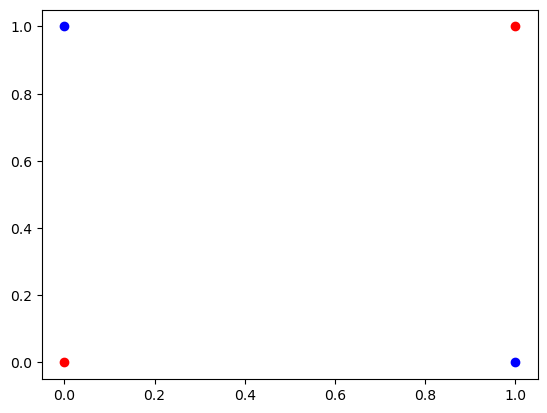

<Figure size 640x480 with 0 Axes>

In [3]:
plt.scatter(X[0:2, 0], X[0:2, 1], color='blue')
plt.scatter(X[2:4,0], X[2:4,1], color='red')
plt.show()
plt.clf()

In [4]:
my_mlp = MyMLP([2,2,1])

In [8]:
my_mlp.train(X , Y, is_classification=True, iteration_count=100000, alpha=0.01)

predictions =[my_mlp.predict(x, is_classification=True) for x in X]
print(predictions)
accuracy = my_mlp.calculate_accuracy(X,Y)
print(accuracy)

loss_history = []
loss = my_mlp.calculate_loss(X,Y)
loss_history.append(loss)
print("Loss:", loss)
print("evolution du loss", loss_history)


[[0.9795742255807436], [0.9798305311509399], [-0.9754676027368763], [-0.9734313791289562]]
1.0
Loss: [nan nan]
evolution du loss [array([nan, nan])]


[[-0.9754676027368763], [-0.9741525660136128], [-0.9727032009398631], [-0.9711029242084199], [-0.9693327874229516], [-0.9673711067172914], [-0.9651930318626235], [-0.9627700452728397], [-0.9600693800920536], [-0.9570533453184825], [-0.953678544775111], [-0.9498949758196374], [-0.9456449932051034], [-0.9408621237673985], [-0.9354697190686216], [-0.9293794363844419], [-0.9224895443349549], [-0.9146830591513027], [-0.9058257325106336], [-0.895763933898451], [-0.8843225017719982], [-0.8713026808670733], [-0.8564803202848116], [-0.8396045804732707], [-0.8203974874229505], [-0.7985547770194239], [-0.7737485843220695], [-0.7456326367664982], [-0.7138506815910584], [-0.6780488779452342], [-0.6378927619283031], [-0.5930890887198211], [-0.5434123148678351], [-0.488734677998301], [-0.4290577931072722], [-0.36454254163032856], [-0.29553302478674337], [-0.2225698277273041], [-0.14638815898298257], [-0.06789783949463359], [0.011855405645351402], [0.09174474754965767], [0.17062744676857372], [0.24741

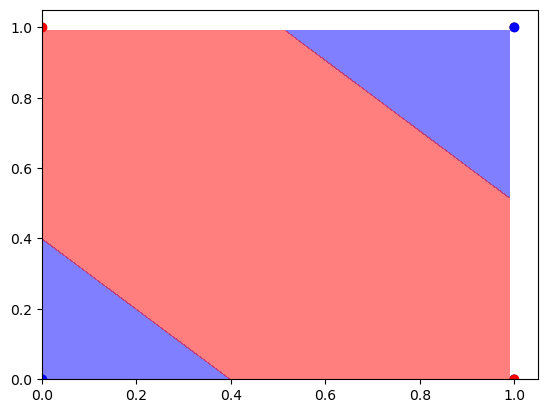

In [9]:
#Conversion des prédictions en couleurs pour le tracé du graphe
x_min, x_max = 0., 1.
y_min, y_max = 0., 1.
step = 0.01
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
gridpoints = np.c_[xx.ravel(), yy.ravel()]


output_ptr =  [my_mlp.predict(x, is_classification=True) for x in gridpoints]
# predicted_outputs.append(predicted_output)
print(output_ptr)

plt.scatter(X[:, 0], X[:, 1], c=np.argmax(Y, axis=1))
plt.scatter(X[0:2, 0], X[0:2, 1], color='red')
plt.scatter(X[2:4,0], X[2:4,1], color='blue')
output_ptr = np.array(output_ptr)
contour = output_ptr[:, 0].reshape(xx.shape)

plt.contourf(xx, yy, contour, levels=[-np.inf, 0, np.inf], colors=['blue', 'red'], alpha=0.5)


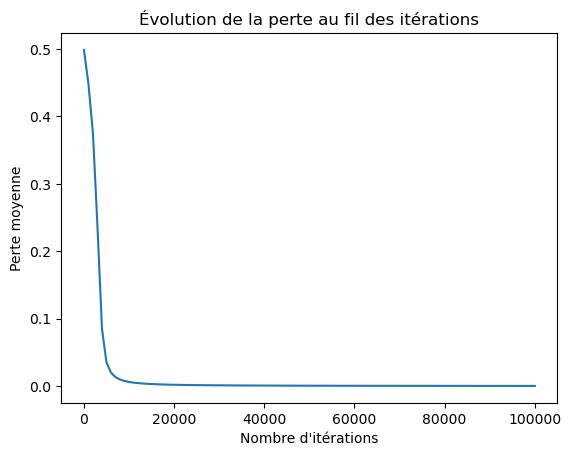

[0.49860980020627044, 0.44818916832603184, 0.37440930913575066, 0.23664484346539344, 0.08469332932614959, 0.03529041215733515, 0.019911368266126557, 0.013238219951594299, 0.009722495603282949, 0.007609780114542454, 0.006182130590668152, 0.005176791829978966, 0.004433889726237376, 0.0038665385582627365, 0.0034227602845503524, 0.0030653264562615526, 0.0027713325043281483, 0.00252720600352699, 0.0023271400318411874, 0.002150918181581891, 0.0019981813224232182, 0.0018631798270342392, 0.0017449608587736505, 0.0016373776616506763, 0.001548304133254727, 0.0014623155647462325, 0.0013874140270904456, 0.0013180580773375244, 0.001255184198906903, 0.0011983890867207586, 0.0011458692783194039, 0.001097871774553974, 0.0010539606749882299, 0.001013173285447031, 0.0009749600650181527, 0.000939501418640047, 0.0009065973839059261, 0.0008758898332803108, 0.0008470024316283252, 0.0008198743188130229, 0.0007945430244875235, 0.0007703549526638666, 0.0007475851845573419, 0.0007261803397914566, 0.000705897713

In [10]:
tab =(my_mlp.loss)
plt.plot(range(0, len(tab) * 1000, 1000), tab)  
plt.xlabel('Nombre d\'itérations')
plt.ylabel('Perte moyenne')
plt.title('Évolution de la perte au fil des itérations')
plt.show()

print(tab)
#title